In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from sklearn.metrics import mean_absolute_error

In [2]:
#df_wages_male = pd.read_excel("employment/Wages_male.xls")
#df_wages_female = pd.read_excel("employment/Wages_female.xls")
#df_vulnerable_male = pd.read_excel("employment/Vulnerable_male.xls")
#df_vulnerable_female = pd.read_excel("employment/Vulnerable_female.xls")
#df_unemployment_15_male = pd.read_excel("employment/Unemployment_15_24_male.xls")
#df_unemployment_15_female = pd.read_excel("employment/Unemployment_15_24_female.xls")
#df_total_unemployment_male = pd.read_excel("employment/Total_Unemployment_male.xls")
#df_total_unemployment_female = pd.read_excel("employment/Total_Unemployment_female.xls")
#df_laborforce_male = pd.read_excel("employment/labor_force_participation_rate_male.xls")
#df_laborforce_female = pd.read_excel("employment/labor_force_participation_rate_female.xls")
df_services_male = pd.read_excel("employment/Employment_services_male.xls")
df_services_female = pd.read_excel("employment/Employment_services_female.xls")
df_agriculture_male = pd.read_excel("employment/Employment_agriculture_male.xls")
df_agriculture_female = pd.read_excel("employment/Employment_agriculture_female.xls")
df_industry_male = pd.read_excel("employment/Employment_indusrty_male.xls")
df_industry_female = pd.read_excel("employment/Employment_indusrty_female.xls")
#df_contributing_male = pd.read_excel("employment/Contributing_family _workers_male.xls")
#df_contributing_female = pd.read_excel("employment/Contributing_family _workers_female.xls")
df_economy_types = pd.read_excel("employment/economy_types.xlsx")
df_employment_female = pd.read_excel("employment/EmploymentToPopulationRatio_15+_female.xls")
df_employment_male = pd.read_excel("employment/EmploymentToPopulationRatio_15+_male.xls")

In [3]:
dict_female = {'Country Name' : df_economy_types['TableName']}
dict_male = {'Country Name' : df_economy_types['TableName']}
dict_GenderEmploymentIndex = {'Country Name' : df_economy_types['TableName'], 'Country Code' : df_economy_types['Country Code'],'IncomeGroup' : df_economy_types['IncomeGroup'], 'Region' : df_economy_types['Region'] }
dict_ServicesIndex = {'Country Name' : df_economy_types['TableName'], 'IncomeGroup' : df_economy_types['IncomeGroup'], 'Region' : df_economy_types['Region'] }
dict_IndustryIndex = {'Country Name' : df_economy_types['TableName'], 'IncomeGroup' : df_economy_types['IncomeGroup'], 'Region' : df_economy_types['Region'] }
dict_AgricultureIndex = {'Country Name' : df_economy_types['TableName'], 'IncomeGroup' : df_economy_types['IncomeGroup'], 'Region' : df_economy_types['Region'] }
j, k = 1, 0
for i in range(30):
    
    #Creating the string representation of the year
    if(i <=8):
        year_str = '199'+str(j)
        j +=1
    elif (i >= 9 and i <= 18) :
        year_str = '200'+str(k)
        k +=1
    else:
        year_str = '20'+str(k)
        k +=1
    
    #factor_wage = (df_wages_female[year_str]*df_employment_female[year_str])/(df_wages_male[year_str]*df_employment_male[year_str])
    #factor_laborforce = df_laborforce_female[year_str]/df_laborforce_male[year_str]
    factor_services = (df_services_female[year_str]*df_employment_female[year_str])/(df_services_male[year_str]*df_employment_male[year_str])
    factor_agriculture = (df_agriculture_female[year_str]*df_employment_female[year_str])/(df_agriculture_male[year_str]*df_employment_male[year_str])
    factor_industry = (df_industry_female[year_str]*df_employment_female[year_str])/(df_industry_male[year_str]*df_employment_male[year_str])
    factor_employment = df_employment_female[year_str]/df_employment_male[year_str]
    
    ratio =   factor_industry   +\
            factor_services   + factor_agriculture
    
    dict_GenderEmploymentIndex[year_str] = ratio/3
    dict_ServicesIndex[year_str] = factor_services
    dict_IndustryIndex[year_str] = factor_industry
    dict_AgricultureIndex[year_str] = factor_agriculture

#Creating the male, female and GEI dataframe 
df_female = pd.DataFrame(dict_female)
df_male = pd.DataFrame(dict_male)
df_GenderEmploymentIndex = pd.DataFrame(dict_GenderEmploymentIndex)
df_GenderServicesIndex = pd.DataFrame(dict_ServicesIndex)
df_GenderIndustryIndex = pd.DataFrame(dict_IndustryIndex)
df_GenderAgricultureIndex = pd.DataFrame(dict_AgricultureIndex)
print(df_GenderAgricultureIndex.head(5))
#df_GenderEmploymentIndex.to_csv (r'comboclustered_data.csv', index = None, header=True) 

           Country Name          IncomeGroup                      Region  \
0           Afghanistan           Low income                  South Asia   
1                Angola  Lower middle income          Sub-Saharan Africa   
2               Albania  Upper middle income       Europe & Central Asia   
3  United Arab Emirates          High income  Middle East & North Africa   
4             Argentina  Upper middle income   Latin America & Caribbean   

       1991      1992      1993      1994      1995      1996      1997  ...  \
0  0.231623  0.232199  0.231855  0.230641  0.233024  0.231250  0.227984  ...   
1  1.483473  1.476862  1.466940  1.471737  1.476816  1.483942  1.481946  ...   
2  1.051762  1.054694  1.037482  1.029736  1.030518  1.024728  1.043581  ...   
3  0.002195  0.002236  0.002284  0.002258  0.002240  0.002291  0.002309  ...   
4  0.175008  0.437392  0.325477  0.250945  0.275114  0.122606  0.137934  ...   

       2011      2012      2013      2014      2015      2016 

2016-12-31    0.381077
2017-12-31    0.381077
2018-12-31    0.381077
2019-12-31    0.381077
2020-12-31    0.381077
Freq: A-DEC, Name: $\alpha=1.0$, dtype: float64
The Root Mean Squared Error of our forecasts is 0.09
2021-12-31    0.498161
2022-12-31    0.498161
2023-12-31    0.498161
2024-12-31    0.498161
2025-12-31    0.498161
Freq: A-DEC, Name: $\alpha=1.0$, dtype: float64


C:\Users\Srihaasa\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


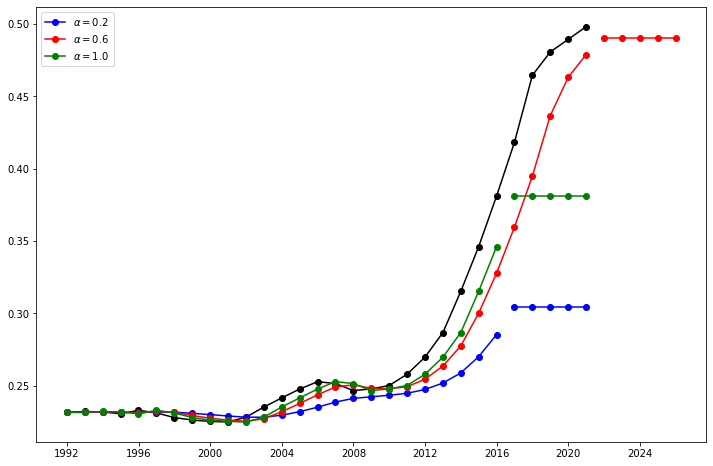

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

data = np.zeros(30)
i=0
for j in range(1991,2021):
    data[i] = df_GenderAgricultureIndex[str(j)][0]
    i = i+1
index= pd.date_range(start='1991', end='2021', freq='A')
agridata = pd.Series(data, index)
fit1 = SimpleExpSmoothing(agridata.iloc[0:25]).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(5).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(agridata).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(5).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(agridata.iloc[0:25]).fit()
fcast3 = fit3.forecast(5).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
print(fcast3)
mse1 = ((fcast3 - agridata.iloc[25:30]) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is '+str(round(np.sqrt(mse1), 2)))
fit4 = SimpleExpSmoothing(agridata).fit()
fcast4 = fit4.forecast(5).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
print(fcast4)
plt.figure(figsize=(12, 8))
plt.plot(agridata, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline
rmseavg=0
data_21= np.zeros(187)
data_22= np.zeros(187)
data_23= np.zeros(187)
data_24= np.zeros(187)
data_25= np.zeros(187)
for k in range(0,187):
    data = np.zeros(30)
    i=0
    for j in range(1991,2021):
        data[i] = df_GenderAgricultureIndex[str(j)][k]
        i = i+1
    index= pd.date_range(start='1991', end='2021', freq='A')
    agridata = pd.Series(data, index)
    fit3 = SimpleExpSmoothing(agridata.iloc[0:25]).fit()
    fcast3 = fit3.forecast(5).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
    mse1 = ((fcast3 - agridata.iloc[25:30]) ** 2).mean()
    rmseavg+= (round(np.sqrt(mse1), 2))
    Error = np.sum(np.abs(np.subtract(agridata.iloc[25:30],fcast3)))
    Average = np.sum(agridata.iloc[25:30])
    MAPE = MAPE+ (Error/Average)
    MAE = MAE+ mean_absolute_error(agridata.iloc[25:30], fcast3)
    fit4 = SimpleExpSmoothing(agridata).fit()
    fcast4 = fit4.forecast(5).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
    #print(fcast4)
    data_21[k]= fcast4[0]
    data_22[k]= fcast4[1]
    data_23[k]= fcast4[2]
    data_24[k]= fcast4[3]
    data_25[k]= fcast4[4]
print('RMSE: '+ str(rmseavg/187))
print('MAPE: '+ str(MAPE/187))
print('MAE: '+ str(MAE/187))
df_GenderAgricultureIndex['2021']= data_21
df_GenderAgricultureIndex['2022']= data_22
df_GenderAgricultureIndex['2023']= data_23
df_GenderAgricultureIndex['2024']= data_24
df_GenderAgricultureIndex['2025']= data_25
print(df_GenderAgricultureIndex.head())

NameError: name 'MAPE' is not defined

In [ ]:
rmseavg=0
data_21= np.zeros(187)
data_22= np.zeros(187)
data_23= np.zeros(187)
data_24= np.zeros(187)
data_25= np.zeros(187)
for k in range(0,187):
    data = np.zeros(30)
    i=0
    for j in range(1991,2021):
        data[i] = df_GenderIndustryIndex[str(j)][k]
        i = i+1
    index= pd.date_range(start='1991', end='2021', freq='A')
    industrydata = pd.Series(data, index)
    fit3 = SimpleExpSmoothing(industrydata.iloc[0:25]).fit()
    fcast3 = fit3.forecast(5).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
    mse1 = ((fcast3 - industrydata.iloc[25:30]) ** 2).mean()
    rmseavg+= (round(np.sqrt(mse1), 2))
    Error = np.sum(np.abs(np.subtract(industrydata.iloc[25:30],fcast3)))
    Average = np.sum(industrydata.iloc[25:30])
    MAPE = MAPE+ (Error/Average)
    MAE = MAE+ mean_absolute_error(industrydata.iloc[25:30], fcast3)
    fit4 = SimpleExpSmoothing(industrydata).fit()
    fcast4 = fit4.forecast(5).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
    #print(fcast4)
    data_21[k]= fcast4[0]
    data_22[k]= fcast4[1]
    data_23[k]= fcast4[2]
    data_24[k]= fcast4[3]
    data_25[k]= fcast4[4]
print('RMSE: '+ str(rmseavg/187))
print('MAPE: '+ str(MAPE/187))
print('MAE: '+ str(MAE/187))
df_GenderIndustryIndex['2021']= data_21
df_GenderIndustryIndex['2022']= data_22
df_GenderIndustryIndex['2023']= data_23
df_GenderIndustryIndex['2024']= data_24
df_GenderIndustryIndex['2025']= data_25
print(df_GenderIndustryIndex.head())

In [ ]:
rmseavg=0
MAPE=0
MAE=0
data_21= np.zeros(187)
data_22= np.zeros(187)
data_23= np.zeros(187)
data_24= np.zeros(187)
data_25= np.zeros(187)
for k in range(0,187):
    data = np.zeros(30)
    i=0
    for j in range(1991,2021):
        data[i] = df_GenderServicesIndex[str(j)][k]
        i = i+1
    index= pd.date_range(start='1991', end='2021', freq='A')
    servicesdata = pd.Series(data, index)
    fit3 = SimpleExpSmoothing(servicesdata.iloc[0:25]).fit()
    fcast3 = fit3.forecast(5).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
    mse1 = ((fcast3 - servicesdata.iloc[25:30]) ** 2).mean()
    rmseavg+= (round(np.sqrt(mse1), 2))
    Error = np.sum(np.abs(np.subtract(servicesdata.iloc[25:30],fcast3)))
    Average = np.sum(servicesdata.iloc[25:30])
    MAPE = MAPE+ (Error/Average)
    MAE = MAE+ mean_absolute_error(servicesdata.iloc[25:30], fcast3)
    fit4 = SimpleExpSmoothing(servicesdata).fit()
    fcast4 = fit4.forecast(5).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
    #print(fcast4)
    data_21[k]= fcast4[0]
    data_22[k]= fcast4[1]
    data_23[k]= fcast4[2]
    data_24[k]= fcast4[3]
    data_25[k]= fcast4[4]
print('RMSE: '+ str(rmseavg/187))
print('MAPE: '+ str(MAPE/187))
print('MAE: '+ str(MAE/187))
df_GenderServicesIndex['2021']= data_21
df_GenderServicesIndex['2022']= data_22
df_GenderServicesIndex['2023']= data_23
df_GenderServicesIndex['2024']= data_24
df_GenderServicesIndex['2025']= data_25
print(df_GenderServicesIndex.head())

In [ ]:
data_21= np.zeros(187)
data_22= np.zeros(187)
data_23= np.zeros(187)
data_24= np.zeros(187)
data_25= np.zeros(187)
for k in range(0,187):
    data_21[k]= (df_GenderAgricultureIndex['2021'][k]+ df_GenderIndustryIndex['2021'][k]+ df_GenderServicesIndex['2021'][k])/3
    data_22[k]= (df_GenderAgricultureIndex['2022'][k]+ df_GenderIndustryIndex['2022'][k]+ df_GenderServicesIndex['2022'][k])/3
    data_23[k]= (df_GenderAgricultureIndex['2023'][k]+ df_GenderIndustryIndex['2023'][k]+ df_GenderServicesIndex['2023'][k])/3
    data_24[k]= (df_GenderAgricultureIndex['2024'][k]+ df_GenderIndustryIndex['2024'][k]+ df_GenderServicesIndex['2024'][k])/3
    data_25[k]= (df_GenderAgricultureIndex['2025'][k]+ df_GenderIndustryIndex['2025'][k]+ df_GenderServicesIndex['2025'][k])/3
df_GenderEmploymentIndex['2021']= data_21
df_GenderEmploymentIndex['2022']= data_22
df_GenderEmploymentIndex['2023']= data_23
df_GenderEmploymentIndex['2024']= data_24
df_GenderEmploymentIndex['2025']= data_25
print(df_GenderEmploymentIndex.head())    

In [ ]:
df_GenderEmploymentIndex['pre5yearaverage'] = df_GenderEmploymentIndex[['2016','2017','2018','2019','2020']].mean(axis=1)
df_GenderEmploymentIndex['post5yearaverage'] = df_GenderEmploymentIndex[['2021','2022','2023','2024','2025']].mean(axis=1)


In [6]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(data=go.Choropleth(
    locations = df_GenderEmploymentIndex['Country Code'],
    z = df_GenderEmploymentIndex['pre5yearaverage'],
    text = df_GenderEmploymentIndex['Country Name'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'GEPI',
))

fig.update_layout(
    title_text='Average GEPI of countries from 2016 to 2020',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
    
)

fig.show()

KeyError: 'pre5yearaverage'

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = df_GenderEmploymentIndex['Country Code'],
    z = df_GenderEmploymentIndex['post5yearaverage'],
    text = df_GenderEmploymentIndex['Country Name'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'GEPI',
))

fig.update_layout(
    title_text='Average forecasted GEPI of countries from 2021 to 2025',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
    
)

fig.show()